<a href="https://colab.research.google.com/github/Kachiyash7315/LA1/blob/master/41227_DL_Lab_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import pandas as pd
import math
import datetime
import platform
import imageio
import PIL
import time
import os
import glob
import zipfile

from IPython import display

In [ ]:
train = pd.read_csv('fashion-mnist_train.csv')
test = pd.read_csv('fashion-mnist_test.csv')

In [ ]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
train.info(), train.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


(None, (60000, 785))

In [ ]:
test.info(),  test.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 59.9 MB


(None, (10000, 785))

Training and testing dataset

In [ ]:
X_train = train.iloc[:, 1:785]
y_train = train.iloc[:, 0]

X_test = test.iloc[:, 1:785]
y_test = test.iloc[:, 0]

Diamension of training and testing data

In [ ]:
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_validation:', X_test.shape)
print('y_validation:', y_test.shape)

X_train: (60000, 784)
y_train: (60000,)
X_validation: (10000, 784)
y_validation: (10000,)


Converting training, and testing dataset into NumPy arrays

In [ ]:
x_train_re = X_train.to_numpy().reshape(60000, 28, 28)
y_train_re = y_train.values
x_test_re = X_test.to_numpy().reshape(10000, 28, 28)
y_test_re = y_test.values

Diamension of training, and testing data after reshape

In [ ]:
print('x_train:', x_train_re.shape)
print('y_train:', y_train_re.shape)
print('x_test:', x_test_re.shape)
print('y_test:', y_test_re.shape)
print('x_test:', x_test_re.shape)

x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)
x_test: (10000, 28, 28)


In [ ]:
#Each image is associated with a single label. Since the clothing class names are not included with the dataset, store them here for later use when plotting the images:
clothing_class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
#The labels are an array of integers numbered 0 to 9.
y_train_re, len(y_train_re)

(array([2, 9, 6, ..., 8, 8, 7]), 60000)

In [ ]:
y_test_re, len(y_test_re), set(y_test_re)

(array([0, 1, 2, ..., 8, 8, 1]), 10000, {0, 1, 2, 3, 4, 5, 6, 7, 8, 9})

In [ ]:
# Save image parameters to the constants that we will use later for data re-shaping and for model traning.
(_, IMAGE_WIDTH, IMAGE_HEIGHT) = x_train_re.shape
IMAGE_CHANNELS = 1

print('IMAGE_WIDTH:', IMAGE_WIDTH);
print('IMAGE_HEIGHT:', IMAGE_HEIGHT);
print('IMAGE_CHANNELS:', IMAGE_CHANNELS);

IMAGE_WIDTH: 28
IMAGE_HEIGHT: 28
IMAGE_CHANNELS: 1


Explore the data

In [ ]:
pd.DataFrame(x_train_re[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,88,201,228,...,255,135,0,0,0,0,0,0,0,0
5,0,0,0,0,0,47,252,234,238,224,...,231,249,254,45,0,0,0,0,0,0
6,0,0,1,0,0,214,222,210,213,224,...,223,221,240,254,0,0,1,0,0,0
7,1,0,0,0,128,237,207,224,224,207,...,213,226,211,237,150,0,0,0,0,0
8,0,2,0,0,237,222,215,207,210,212,...,214,206,199,218,255,13,0,2,0,0
9,0,4,0,85,228,210,218,200,211,208,...,210,217,206,213,231,175,0,0,0,0


Visualise the article images

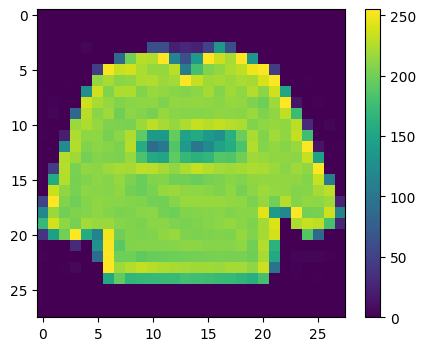

In [ ]:
plt.figure(figsize=(5, 4))
plt.imshow(x_train_re[0])
plt.colorbar()
plt.grid(False)
plt.show()

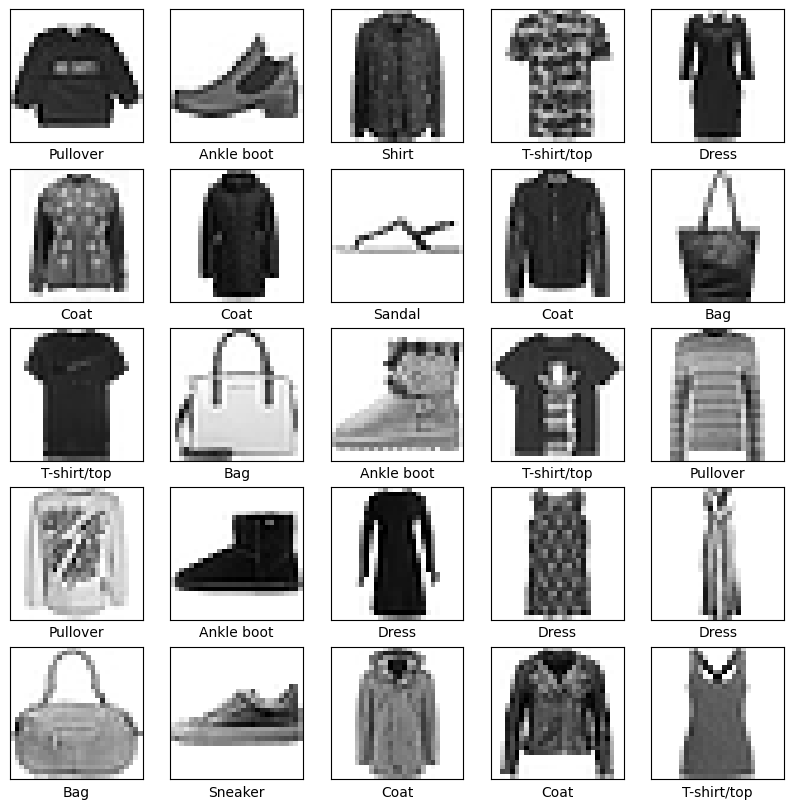

In [ ]:
# Display the first 25 images of article from the training set and also display the class name below each image. This will give us the sense of data is in correct format for training our model.

numbers_to_display = 25
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(10,10))
for i in range(numbers_to_display):
    plt.subplot(num_cells, num_cells, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train_re[i], cmap=plt.cm.binary)
    plt.xlabel(clothing_class_names[y_train[i]])
plt.show()

Reshaping training dataset

In [ ]:
x_train_with_chanels = x_train_re.reshape(
    x_train_re.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

In [ ]:
print('Shape of the training dataset after reshape: ', x_train_with_chanels.shape)

Shape of the training dataset after reshape:  (60000, 28, 28, 1)


Reshaping testing dataset

In [ ]:
x_test_with_chanels = x_test_re.reshape(
    x_test_re.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

In [ ]:
print('Shape of the testing dataset  after reshape: ', x_test_with_chanels.shape)

Shape of the testing dataset  after reshape:  (10000, 28, 28, 1)


 Normalize training, and testing dataset

In [ ]:
# Normalize image pixel values to [-1, 1] range
x_train_normalized = x_train_with_chanels / 255.0
x_test_normalized = x_test_with_chanels / 255.0

In [ ]:
x_train_normalized[0,:,:,0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

Build the CNN model to Classify clothing images into categories

In [ ]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Convolution2D(
    input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS),
    kernel_size=5,
    filters=8,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model.add(tf.keras.layers.Convolution2D(
    kernel_size=5,
    filters=16,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(
    units=128,
    activation=tf.keras.activations.relu
));

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(
    units=10,
    activation=tf.keras.activations.softmax,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 24, 24, 8)         208       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 12, 12, 8)         0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 16)          3216      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 4, 4, 16)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)              

Visualization of the model using graphviz

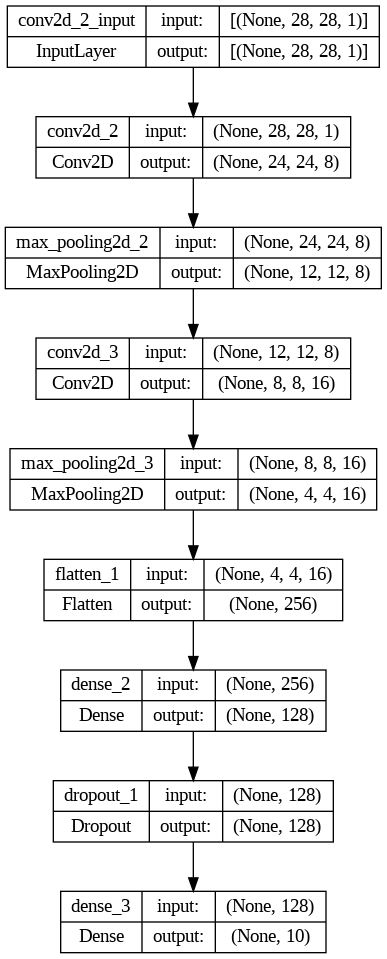

In [ ]:
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
)

 Compile the model using keras.optimizers.Adam

In [ ]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer=adam_optimizer,
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

Train the model

In [ ]:
log_dir=".logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

training_history = model.fit(
    x_train_normalized,
    y_train_re,
    epochs=10,
    validation_data=(x_test_normalized, y_test_re),
    callbacks=[tensorboard_callback]
)

Epoch 1/10
1875/1875 [==============================] - 35s 18ms/step - loss: 0.5634 - accuracy: 0.7954 - val_loss: 0.4004 - val_accuracy: 0.8554
Epoch 2/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.3849 - accuracy: 0.8597 - val_loss: 0.3345 - val_accuracy: 0.8762
Epoch 3/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.3359 - accuracy: 0.8781 - val_loss: 0.3094 - val_accuracy: 0.8826
Epoch 4/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.3077 - accuracy: 0.8879 - val_loss: 0.2889 - val_accuracy: 0.8922
Epoch 5/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.2855 - accuracy: 0.8952 - val_loss: 0.2821 - val_accuracy: 0.8942
Epoch 6/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.2725 - accuracy: 0.9002 - val_loss: 0.2755 - val_accuracy: 0.8988
Epoch 7/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.2577 - accuracy: 0.9059 - val_loss: 0.2672 -

Save and load the model

In [ ]:
model_name = 'fashion_mnist_cnn.h5'
model.save(model_name, save_format='h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
loaded_model = tf.keras.models.load_model(model_name)

Visualize test predicted image category

In [ ]:
predictions_one_hot = loaded_model.predict([x_test_normalized])

313/313 [==============================] - 2s 5ms/step


In [ ]:
predictions_one_hot[0]

array([9.7817129e-01, 1.0545067e-08, 1.3871335e-04, 1.0053575e-05,
       1.8062434e-05, 2.8336737e-11, 2.1660568e-02, 8.2422852e-14,
       1.3476791e-06, 1.1838848e-12], dtype=float32)

In [ ]:
print('predictions_one_hot:', predictions_one_hot.shape)

predictions_one_hot: (10000, 10)


In [ ]:
# Predictions in form of one-hot vectors (arrays of probabilities).
pd.DataFrame(predictions_one_hot)

,0,1,2,3,4,5,6,7,8,9
0,9.781713e-01,1.054507e-08,1.387134e-04,1.005358e-05,1.806243e-05,2.833674e-11,2.166057e-02,8.242285e-14,1.347679e-06,1.183885e-12
1,4.901504e-07,9.999985e-01,8.681940e-09,7.254580e-07,6.736416e-12,2.249548e-13,1.856811e-08,6.003004e-18,1.885024e-07,2.334280e-17
2,1.304453e-02,1.647262e-08,8.660486e-01,3.966413e-04,1.251925e-05,1.542320e-05,1.204806e-01,6.072234e-10,1.509831e-06,2.131706e-07
3,2.144294e-01,5.674448e-06,7.968351e-03,1.998608e-02,1.032673e-02,1.303704e-05,7.411107e-01,2.468794e-07,6.153781e-03,5.925897e-06
4,4.385643e-04,3.680170e-06,1.977801e-03,2.784298e-01,7.060228e-01,6.158714e-07,1.312473e-02,1.048785e-07,1.660948e-06,2.373103e-07
...,...,...,...,...,...,...,...,...,...,...
9995,9.560623e-01,3.957454e-06,4.464129e-03,1.900941e-03,1.597766e-04,9.386495e-08,3.738194e-02,5.760875e-09,2.672289e-05,5.897483e-08
9996,1.905299e-02,1.703549e-05,4.883722e-01,1.477049e-01,6.265741e-03,4.424952e-05,3.370953e-01,1.533594e-07,1.424885e-03,2.257322e-05
9997,1.191101e-08,3.752947e-12,4.499281e-14,8.508460e-12,4.556542e-13,2.882538e-08,5.465138e-10,2.692111e-07,9.999996e-01,3.960532e-08
9998,9.652261e-02,8.022982e-05,7.425669e-03,2.315714e-03,1.458864e-03,3.931109e-04,1.844257e-01,2.954006e-04,7.056832e-01,1.399461e-03


In [ ]:
# Let's extract predictions with highest probabilites and detect what digits have been actually recognized.
predictions = np.argmax(predictions_one_hot, axis=1)
pd.DataFrame(predictions)

,0
0,0
1,1
2,2
3,6
4,4
...,...
9995,0
9996,2
9997,8
9998,8


In [ ]:
print(predictions[0])
print(clothing_class_names[predictions[0]])

0
T-shirt/top


In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(clothing_class_names[predicted_label],
                                100*np.max(predictions_array),
                                clothing_class_names[true_label]),
                                color=color)

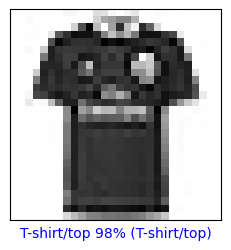

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions_one_hot, y_test_re, x_test_normalized)

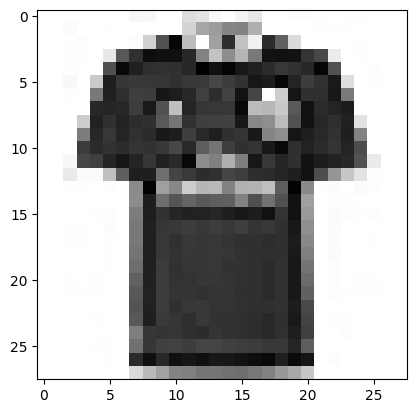

In [ ]:
plt.imshow(x_test_normalized[0].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=plt.cm.binary)
plt.show()

<ipython-input-104-75bf9fcbde8a>:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(num_cells, num_cells, plot_index + 1)


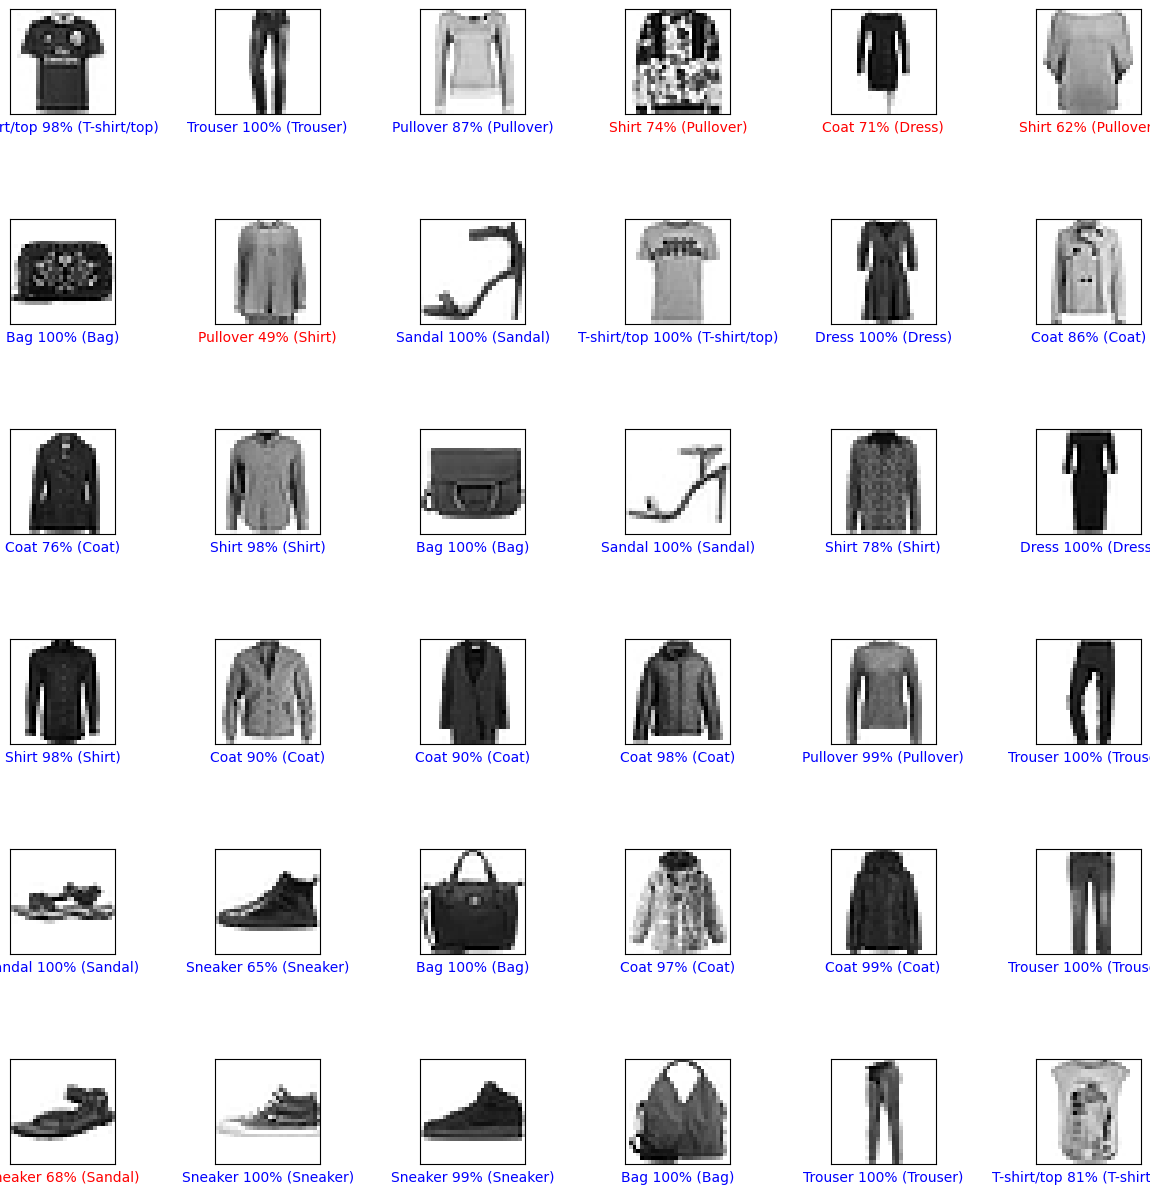

In [ ]:
numbers_to_display = 36
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(15, 15))

for plot_index in range(numbers_to_display):
    predicted_label = predictions[plot_index]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    color_map = 'Greens' if predicted_label == y_test_re[plot_index] else 'Reds'
    plt.subplot(num_cells, num_cells, plot_index + 1)
    plot_image(plot_index, predictions_one_hot, y_test_re, x_test_normalized)
    #plt.imshow(x_test_normalized[plot_index].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=color_map)
    #plt.xlabel(predicted_label)

plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show()

 Performance of the training dataset

In [ ]:
%%capture
train_loss, train_accuracy = model.evaluate(x_train_normalized, y_train_re)

In [ ]:
print('Train loss: ', train_loss)
print('Train accuracy: ', train_accuracy)

Train loss:  0.2011660635471344
Train accuracy:  0.9269000291824341


 Performance of the test dataset

In [ ]:
%%capture
validation_loss, validation_accuracy = model.evaluate(x_test_normalized, y_test_re)

In [ ]:
print('Testing loss: ', validation_loss)
print('Testing accuracy: ', validation_accuracy)

Testing loss:  0.25542759895324707
Testing accuracy:  0.9060999751091003


Plotting a confusion matrix

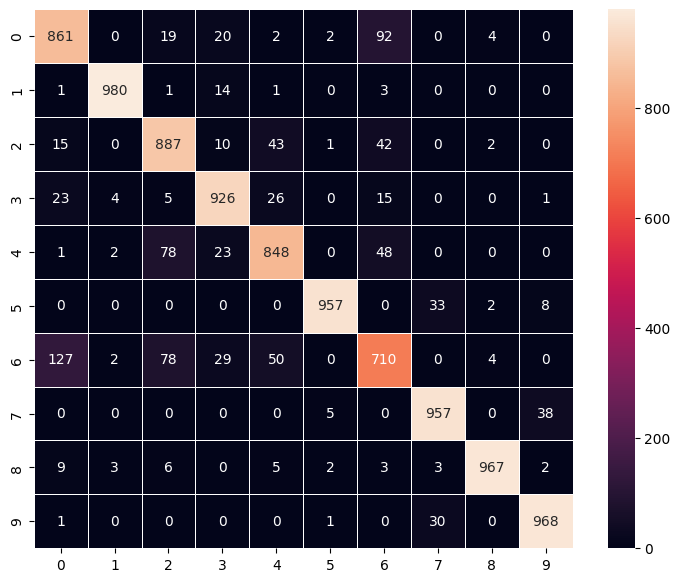

In [ ]:
confusion_matrix = tf.math.confusion_matrix(y_test_re, predictions)
f, ax = plt.subplots(figsize=(9, 7))
sn.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.5,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()